# Flight price prediction

##  Problem statement


Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

In [92]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


#scaling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing regression model as our label is regresssive
!pip install lightgbm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [93]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [94]:
#lets import the dataset
df = pd.read_csv(r'C:\Users\hp\Dropbox\PC\Desktop\Flip Robo internship\flight price prediction\sol\Flights Details.csv')
df

Unnamed: 0          Name DepTime          ArrTime NetDuration  \
0              0        IndiGo   13:00            15:35      2h 35m   
1              1        IndiGo   08:20            11:00      2h 40m   
2              2      Go First   05:50            08:35      2h 45m   
3              3        IndiGo   05:50            08:35      2h 45m   
4              4        IndiGo   02:25            05:15      2h 50m   
5              5        IndiGo   22:55            01:45      2h 50m   
6              6      SpiceJet   06:05            09:00      2h 55m   
7              7        IndiGo   06:55            09:50      2h 55m   
8              8        IndiGo   15:20            18:15      2h 55m   
9              9      Go First   16:45            21:35      4h 50m   
10            10      Go First   16:00            20:55      4h 55m   
11            11      Go First   02:40            07:45      5h 05m   
12            12        IndiGo   12:45            17:55      5h 10m   
13            13      Go First   16:45            22:20      5h 35m   
14            14      Go First   08:35            14:20      5h 45m   
15            15      Go First   18:20            00:10      5h 50m   
16            16      Go First   15:45            21:45      6h 00m   
17            17        IndiGo   17:55            23:55      6h 00m   
18            18        IndiGo   12:45            19:20      6h 35m   
19            19        IndiGo   23:20            06:05      6h 45m   
20            20      Go First   16:45            00:10      7h 25m   
21            21      SpiceJet   09:20            16:50      7h 30m   
22            22        IndiGo   01:50            09:30      7h 40m   
23            23      Go First   07:00            14:45      7h 45m   
24            24      Go First   09:15            17:25      8h 10m   
25            25        IndiGo   15:00            23:40      8h 40m   
26            26        IndiGo   17:55            02:35      8h 40m   
27            27      SpiceJet   15:10            23:55      8h 45m   
28            28      SpiceJet   11:55            21:00      9h 05m   
29            29      SpiceJet   09:35            20:40     11h 05m   
30            30      SpiceJet   11:55            23:55     12h 00m   
31            31      SpiceJet   19:30            08:25     12h 55m   
32            32      SpiceJet   18:25            08:25     14h 00m   
33            33      SpiceJet   18:25            09:00     14h 35m   
34            34      SpiceJet   07:05            08:25     25h 20m   
35            35     Air India   06:10            08:55      2h 45m   
36            36       Vistara   06:15            09:00      2h 45m   
37            37      Air Asia   15:30            20:40      5h 10m   
38            38      Air Asia   10:40            16:25      5h 45m   
39            39      Air Asia   16:15            22:25      6h 10m   
40            40      Air Asia   06:05            13:00      6h 55m   
41            41      Air Asia   08:10            10:40      2h 30m   
42            42      Air Asia   09:35            12:25      2h 50m   
43            43      Air Asia   21:40            00:30      2h 50m   
44            44        IndiGo   09:15            11:55      2h 40m   
45            45      Air Asia   21:00            23:50      2h 50m   
46            46        IndiGo   08:30            15:30      7h 00m   
47            47     Air India   13:30            16:15      2h 45m   
48            48        IndiGo   21:30            00:15      2h 45m   
49            49        IndiGo   13:10            18:00      4h 50m   
50            50        IndiGo   21:05            02:35      5h 30m   
51            51        IndiGo   06:40            13:10      6h 30m   
52            52        IndiGo   11:15            18:00      6h 45m   
53            53        IndiGo   13:35            20:40      7h 05m   
54            54        IndiGo   11:15            16:30      5h 15m   
55            55        IndiGo

### Feature details

1 Name= Name of the plain or aircraft

2 DepTime= Time of departure from the source

3 ArrTime= Time at which the plane arrive at the deatination

4 NetDuration= Total time take by the plane to reach it's destination including the stoppage time at the linking airport if there are any stops.

5 Stops= Total no. of stops in between the source and the destination.

6 DepatureLoc = Source of the plane.

7 ArrivalLoc= Destination of the plane.

8 Varient= plane varient.

9 Price= total cost of the tickets.

I have extracted data on 25/04/2022 from multiple source location to various destination for the date of 28/04/2022.
From Yatra.com

In [95]:
# Checking shape of our dataset
df.shape

(1645, 10)

In [96]:
#checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1645 non-null   int64 
 1   Name          1645 non-null   object
 2   DepTime       1645 non-null   object
 3   ArrTime       1645 non-null   object
 4   NetDuration   1645 non-null   object
 5   Stops         1645 non-null   object
 6   DepartureLoc  1645 non-null   object
 7   ArrivalLoc    1645 non-null   object
 8   Varient       1645 non-null   object
 9   Price         1645 non-null   object
dtypes: int64(1), object(9)
memory usage: 128.6+ KB


In [97]:
# Lets check our datset for null values
df.isnull().sum()

Unnamed: 0      0
Name            0
DepTime         0
ArrTime         0
NetDuration     0
Stops           0
DepartureLoc    0
ArrivalLoc      0
Varient         0
Price           0
dtype: int64

In [98]:
df.drop(columns='Unnamed: 0',inplace=True)

In [99]:
# Again checking our dataset
df.head()

Name DepTime ArrTime NetDuration     Stops DepartureLoc ArrivalLoc  \
0    IndiGo   13:00   15:35      2h 35m  Non Stop    New Delhi  Bangalore   
1    IndiGo   08:20   11:00      2h 40m  Non Stop    New Delhi  Bangalore   
2  Go First   05:50   08:35      2h 45m  Non Stop    New Delhi  Bangalore   
3    IndiGo   05:50   08:35      2h 45m  Non Stop    New Delhi  Bangalore   
4    IndiGo   02:25   05:15      2h 50m  Non Stop    New Delhi  Bangalore   

   Varient  Price  
0  6E-5186  8,159  
1   6E-308  8,159  
2   G8-113  8,159  
3  6E-6612  8,159  
4  6E-5036  8,159

In [100]:
#Checking unique values of each column
df.nunique()

Name               7
DepTime          218
ArrTime          234
NetDuration      335
Stops              4
DepartureLoc       3
ArrivalLoc         7
Varient         1635
Price            629
dtype: int64

In [101]:
# Droping varient
df.drop(columns='Varient',inplace=True)

In [102]:
# checking Dataset
df.head()

Name DepTime ArrTime NetDuration     Stops DepartureLoc ArrivalLoc  \
0    IndiGo   13:00   15:35      2h 35m  Non Stop    New Delhi  Bangalore   
1    IndiGo   08:20   11:00      2h 40m  Non Stop    New Delhi  Bangalore   
2  Go First   05:50   08:35      2h 45m  Non Stop    New Delhi  Bangalore   
3    IndiGo   05:50   08:35      2h 45m  Non Stop    New Delhi  Bangalore   
4    IndiGo   02:25   05:15      2h 50m  Non Stop    New Delhi  Bangalore   

   Price  
0  8,159  
1  8,159  
2  8,159  
3  8,159  
4  8,159

In [103]:
for i in df.columns:
    print(df[i].value_counts())
    print("________________________________________")

Vistara         536
IndiGo          430
Air India       322
Go First        147
SpiceJet        137
Air Asia         72
Alliance Air      1
Name: Name, dtype: int64
________________________________________
07:00    50
06:00    40
06:10    36
09:30    30
11:30    29
13:20    27
15:45    23
17:45    22
10:00    22
08:20    21
19:10    21
16:00    21
08:00    21
07:45    20
21:30    20
09:45    20
06:40    20
08:30    19
06:05    18
13:00    18
17:30    17
21:40    17
17:00    17
21:55    17
21:15    16
06:45    16
07:30    16
18:25    16
18:35    15
07:05    15
05:55    15
18:50    14
16:45    14
08:55    14
05:45    14
07:20    14
09:05    14
10:45    14
06:20    14
12:45    13
06:30    13
18:00    13
12:25    12
22:45    12
07:10    12
19:40    12
21:20    12
12:50    12
09:55    12
11:10    11
10:15    11
14:00    11
20:00    11
17:35    11
10:20    11
11:55    11
15:25    11
09:50    11
19:55    11
13:25    10
20:40    10
19:00    10
20:30    10
22:00     9
17:50     9
11:25     9
14

#### Stops Column

In [104]:
#I will replace the that categorical values from stops column to numeric data

df.Stops.replace({"Non Stop": 0,
            "1 Stop": 1,
            "2 Stop(s)": 2,
            "3 Stop(s)": 3},
           inplace = True)


In [105]:
# Checking stops column
df['Stops'].value_counts()

1    1143
0     273
2     224
3       5
Name: Stops, dtype: int64

Most of the flights are with 1 stop.


#### NetDuration Column

In [106]:
# The column NetDuration is with object datatype by doing below operations to Duration column I will extract numerical value from it.

#Extracting numerical data using Duration 
df["hour"] = df.NetDuration.str.split('h').str.get(0)
df["min"] = df.NetDuration.str.split('h').str.get(1)
df["min"]=df["min"].str.split('m').str.get(0)
df["hour"]=df['hour'].astype('float')
df["min"]=df['min'].astype('float')

df["NetDuration"] = df["hour"] + df["min"]/60


In [107]:
#lets check the data set now
df.head()

Name DepTime ArrTime  NetDuration  Stops DepartureLoc ArrivalLoc  \
0    IndiGo   13:00   15:35     2.583333      0    New Delhi  Bangalore   
1    IndiGo   08:20   11:00     2.666667      0    New Delhi  Bangalore   
2  Go First   05:50   08:35     2.750000      0    New Delhi  Bangalore   
3    IndiGo   05:50   08:35     2.750000      0    New Delhi  Bangalore   
4    IndiGo   02:25   05:15     2.833333      0    New Delhi  Bangalore   

   Price  hour   min  
0  8,159   2.0  35.0  
1  8,159   2.0  40.0  
2  8,159   2.0  45.0  
3  8,159   2.0  45.0  
4  8,159   2.0  50.0

In [108]:
#Using hour and min column I have created Duration column with float values, now I am dropping hour and min columns

df.drop(columns = ["hour","min"], inplace = True)

In [109]:
df.head()

Name DepTime ArrTime  NetDuration  Stops DepartureLoc ArrivalLoc  Price
0    IndiGo   13:00   15:35     2.583333      0    New Delhi  Bangalore  8,159
1    IndiGo   08:20   11:00     2.666667      0    New Delhi  Bangalore  8,159
2  Go First   05:50   08:35     2.750000      0    New Delhi  Bangalore  8,159
3    IndiGo   05:50   08:35     2.750000      0    New Delhi  Bangalore  8,159
4    IndiGo   02:25   05:15     2.833333      0    New Delhi  Bangalore  8,159

#### Price

In [110]:
#Lets convert data type of Price column to float
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

In [111]:
df.head()

Name DepTime ArrTime  NetDuration  Stops DepartureLoc ArrivalLoc  \
0    IndiGo   13:00   15:35     2.583333      0    New Delhi  Bangalore   
1    IndiGo   08:20   11:00     2.666667      0    New Delhi  Bangalore   
2  Go First   05:50   08:35     2.750000      0    New Delhi  Bangalore   
3    IndiGo   05:50   08:35     2.750000      0    New Delhi  Bangalore   
4    IndiGo   02:25   05:15     2.833333      0    New Delhi  Bangalore   

    Price  
0  8159.0  
1  8159.0  
2  8159.0  
3  8159.0  
4  8159.0

### Time

In [112]:
df['ArrTime']=df['ArrTime'].replace({'00:20\n+ 2 days':'00:20','00:40\n+ 2 days':'00:40'})

In [113]:
#Similar to NetDuration I will extract numric data from DepTime and ArrTime columns using below codes


df["Dep_hour"] = pd.to_datetime(df.DepTime, format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df.DepTime, format="%H:%M").dt.minute
df["DepTime"]= df['Dep_hour']+df['Dep_min']/60
df.drop(columns = ['Dep_hour','Dep_min'],inplace=True)     


df["Arvl_hour"] = pd.to_datetime(df.ArrTime, format="%H:%M").dt.hour
df["arvl_min"] = pd.to_datetime(df.ArrTime, format="%H:%M").dt.minute
df["ArrTime"]= df['Arvl_hour']+df['arvl_min']/60
df.drop(columns = ['Arvl_hour','arvl_min'],inplace=True) 

In [114]:
df.head()

Name    DepTime    ArrTime  NetDuration  Stops DepartureLoc ArrivalLoc  \
0    IndiGo  13.000000  15.583333     2.583333      0    New Delhi  Bangalore   
1    IndiGo   8.333333  11.000000     2.666667      0    New Delhi  Bangalore   
2  Go First   5.833333   8.583333     2.750000      0    New Delhi  Bangalore   
3    IndiGo   5.833333   8.583333     2.750000      0    New Delhi  Bangalore   
4    IndiGo   2.416667   5.250000     2.833333      0    New Delhi  Bangalore   

    Price  
0  8159.0  
1  8159.0  
2  8159.0  
3  8159.0  
4  8159.0

In [116]:
#lets check the data type again
df.dtypes

Name             object
DepTime         float64
ArrTime         float64
NetDuration     float64
Stops             int64
DepartureLoc     object
ArrivalLoc       object
Price           float64
dtype: object

## EDA

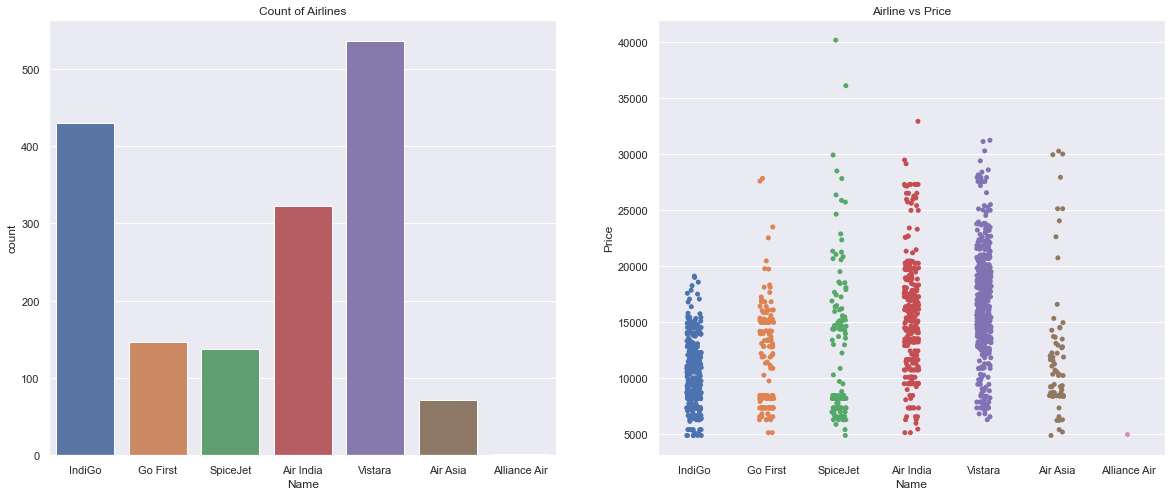

In [120]:
#lets check the count of airlines and check the relation between airline and Price
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Name)
plt.title('Count of Airlines')

plt.subplot(1,2,2)
sns.stripplot(x='Name',y='Price', data=df)
plt.title('Airline vs Price')

plt.show()

In [ ]:
Above plot shows Vistra aireplanes are higher in numbers followed by IndiGo and Air India, Alliance airline is least in numbers.

Above plot also show Price of Spice jet airplanes are higher than IndiGo. 

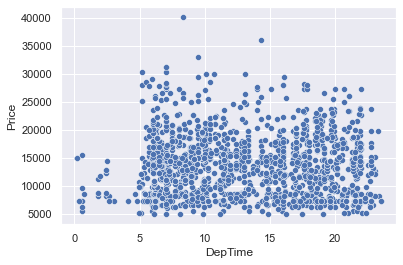

In [121]:
#check the relation between Departure_time and Price
sns.scatterplot(x='DepTime',y='Price',data=df)
plt.show()

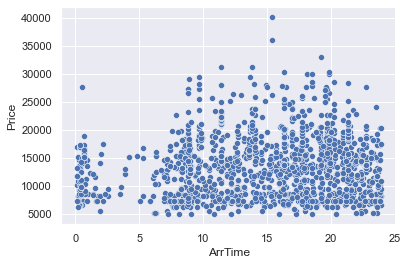

In [124]:
#check the relation between Time_of_arrival and Price
sns.scatterplot(x='ArrTime',y='Price',data=df)
plt.show()

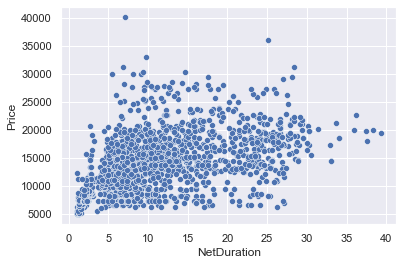

In [125]:
#check the relation between Time_of_arrival and Price
sns.scatterplot(x='NetDuration',y='Price',data=df)
plt.show()

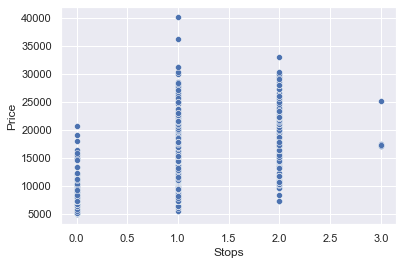

In [126]:
#check the relation between Time_of_arrival and Price
sns.scatterplot(x='Stops',y='Price',data=df)
plt.show()

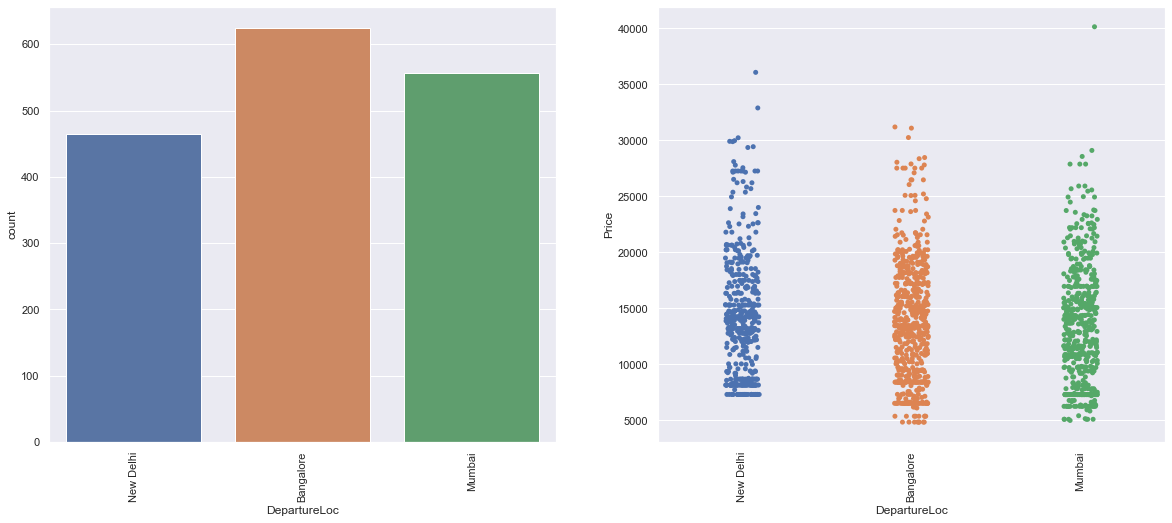

In [128]:
#Lets check the count and relation of Source with target variable
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.DepartureLoc)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='DepartureLoc',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

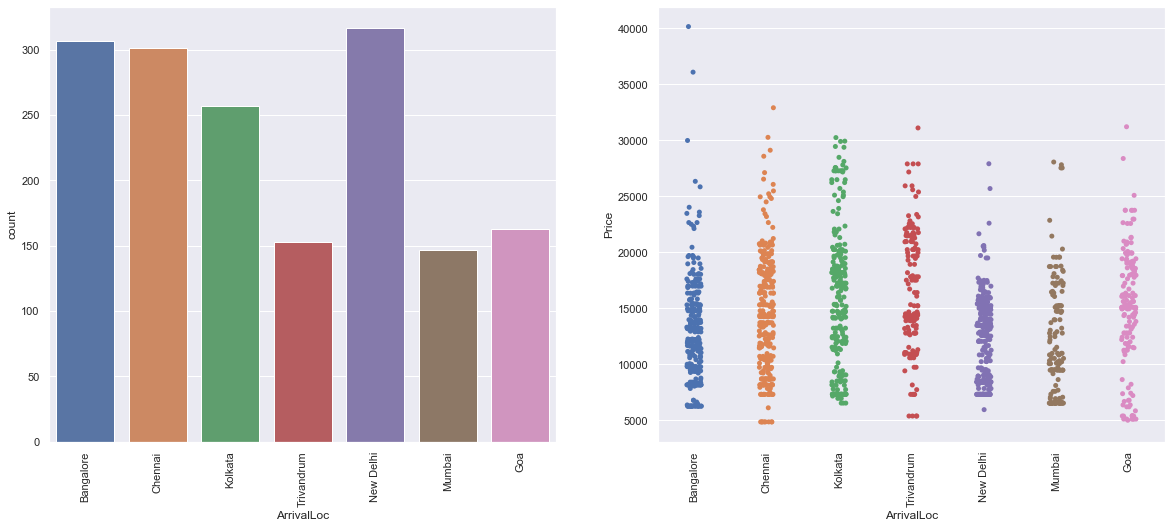

In [129]:
#Lets check the count and relation of Source with target variable
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.ArrivalLoc)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='ArrivalLoc',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

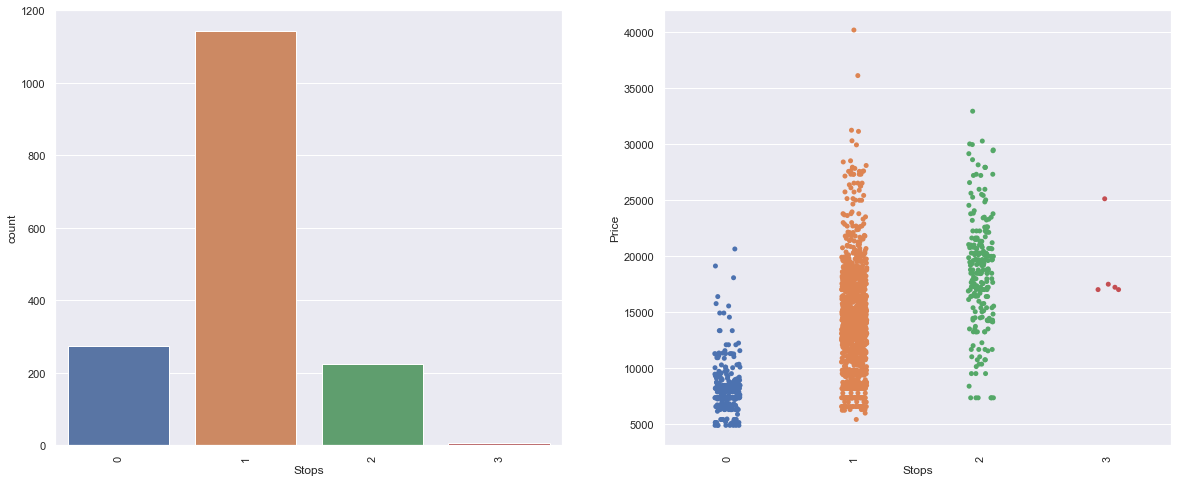

In [130]:
#lets check the count of stops and relation with price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Stops)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Stops',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

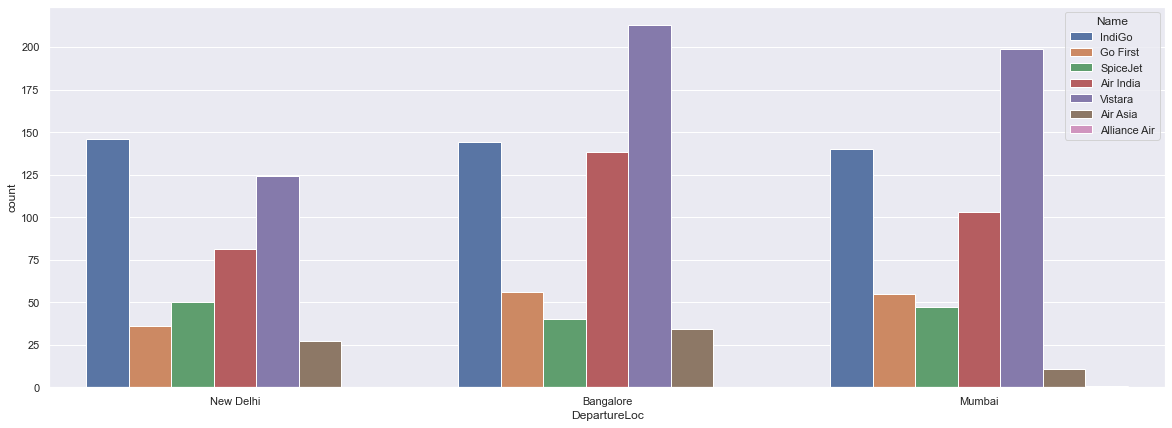

In [131]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "DepartureLoc", hue = "Name", data = df)
plt.show()

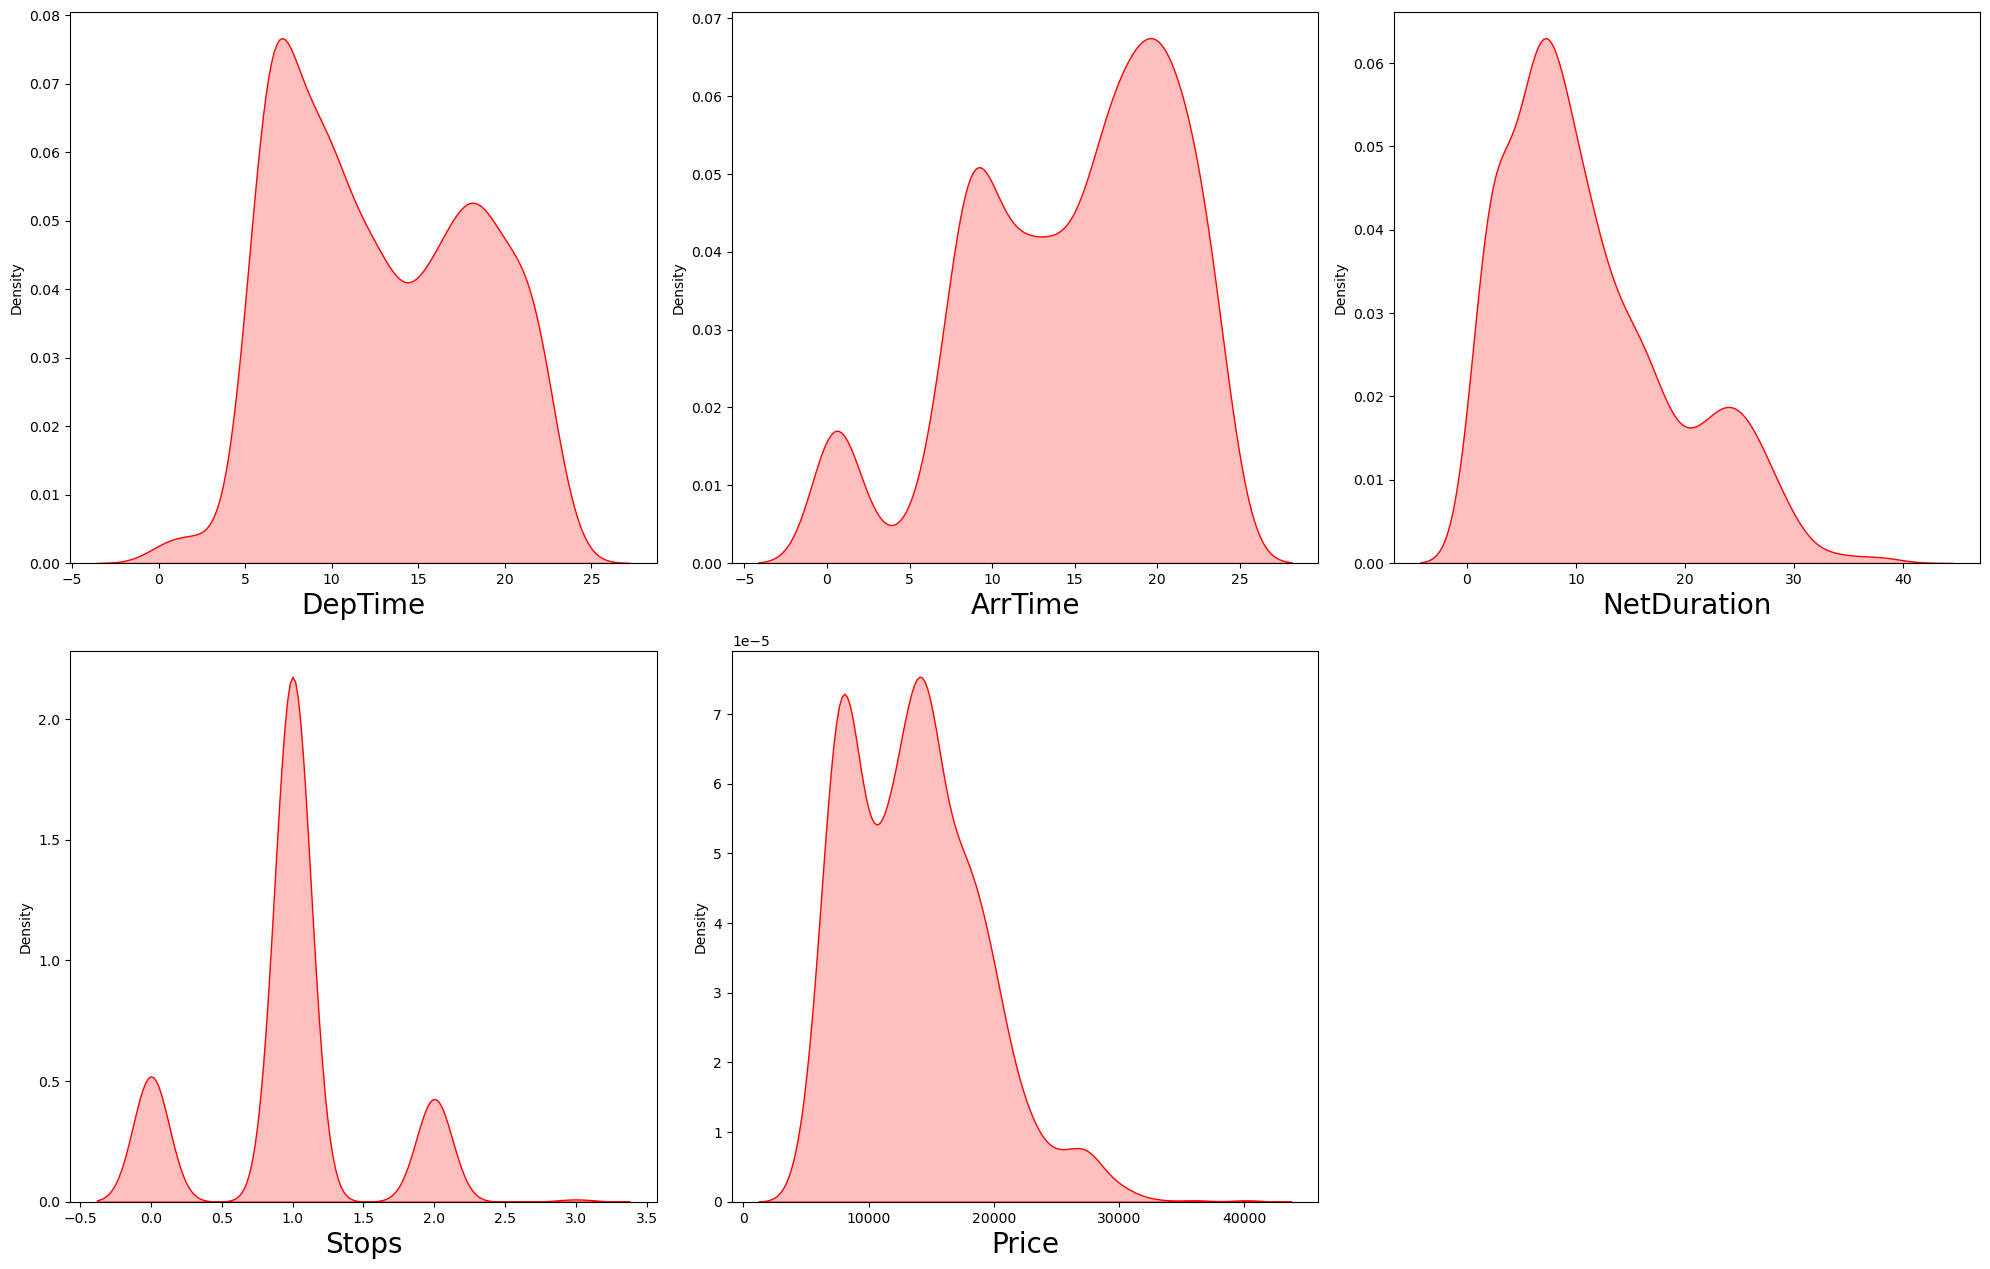

In [132]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Data Cleaning

<AxesSubplot:>

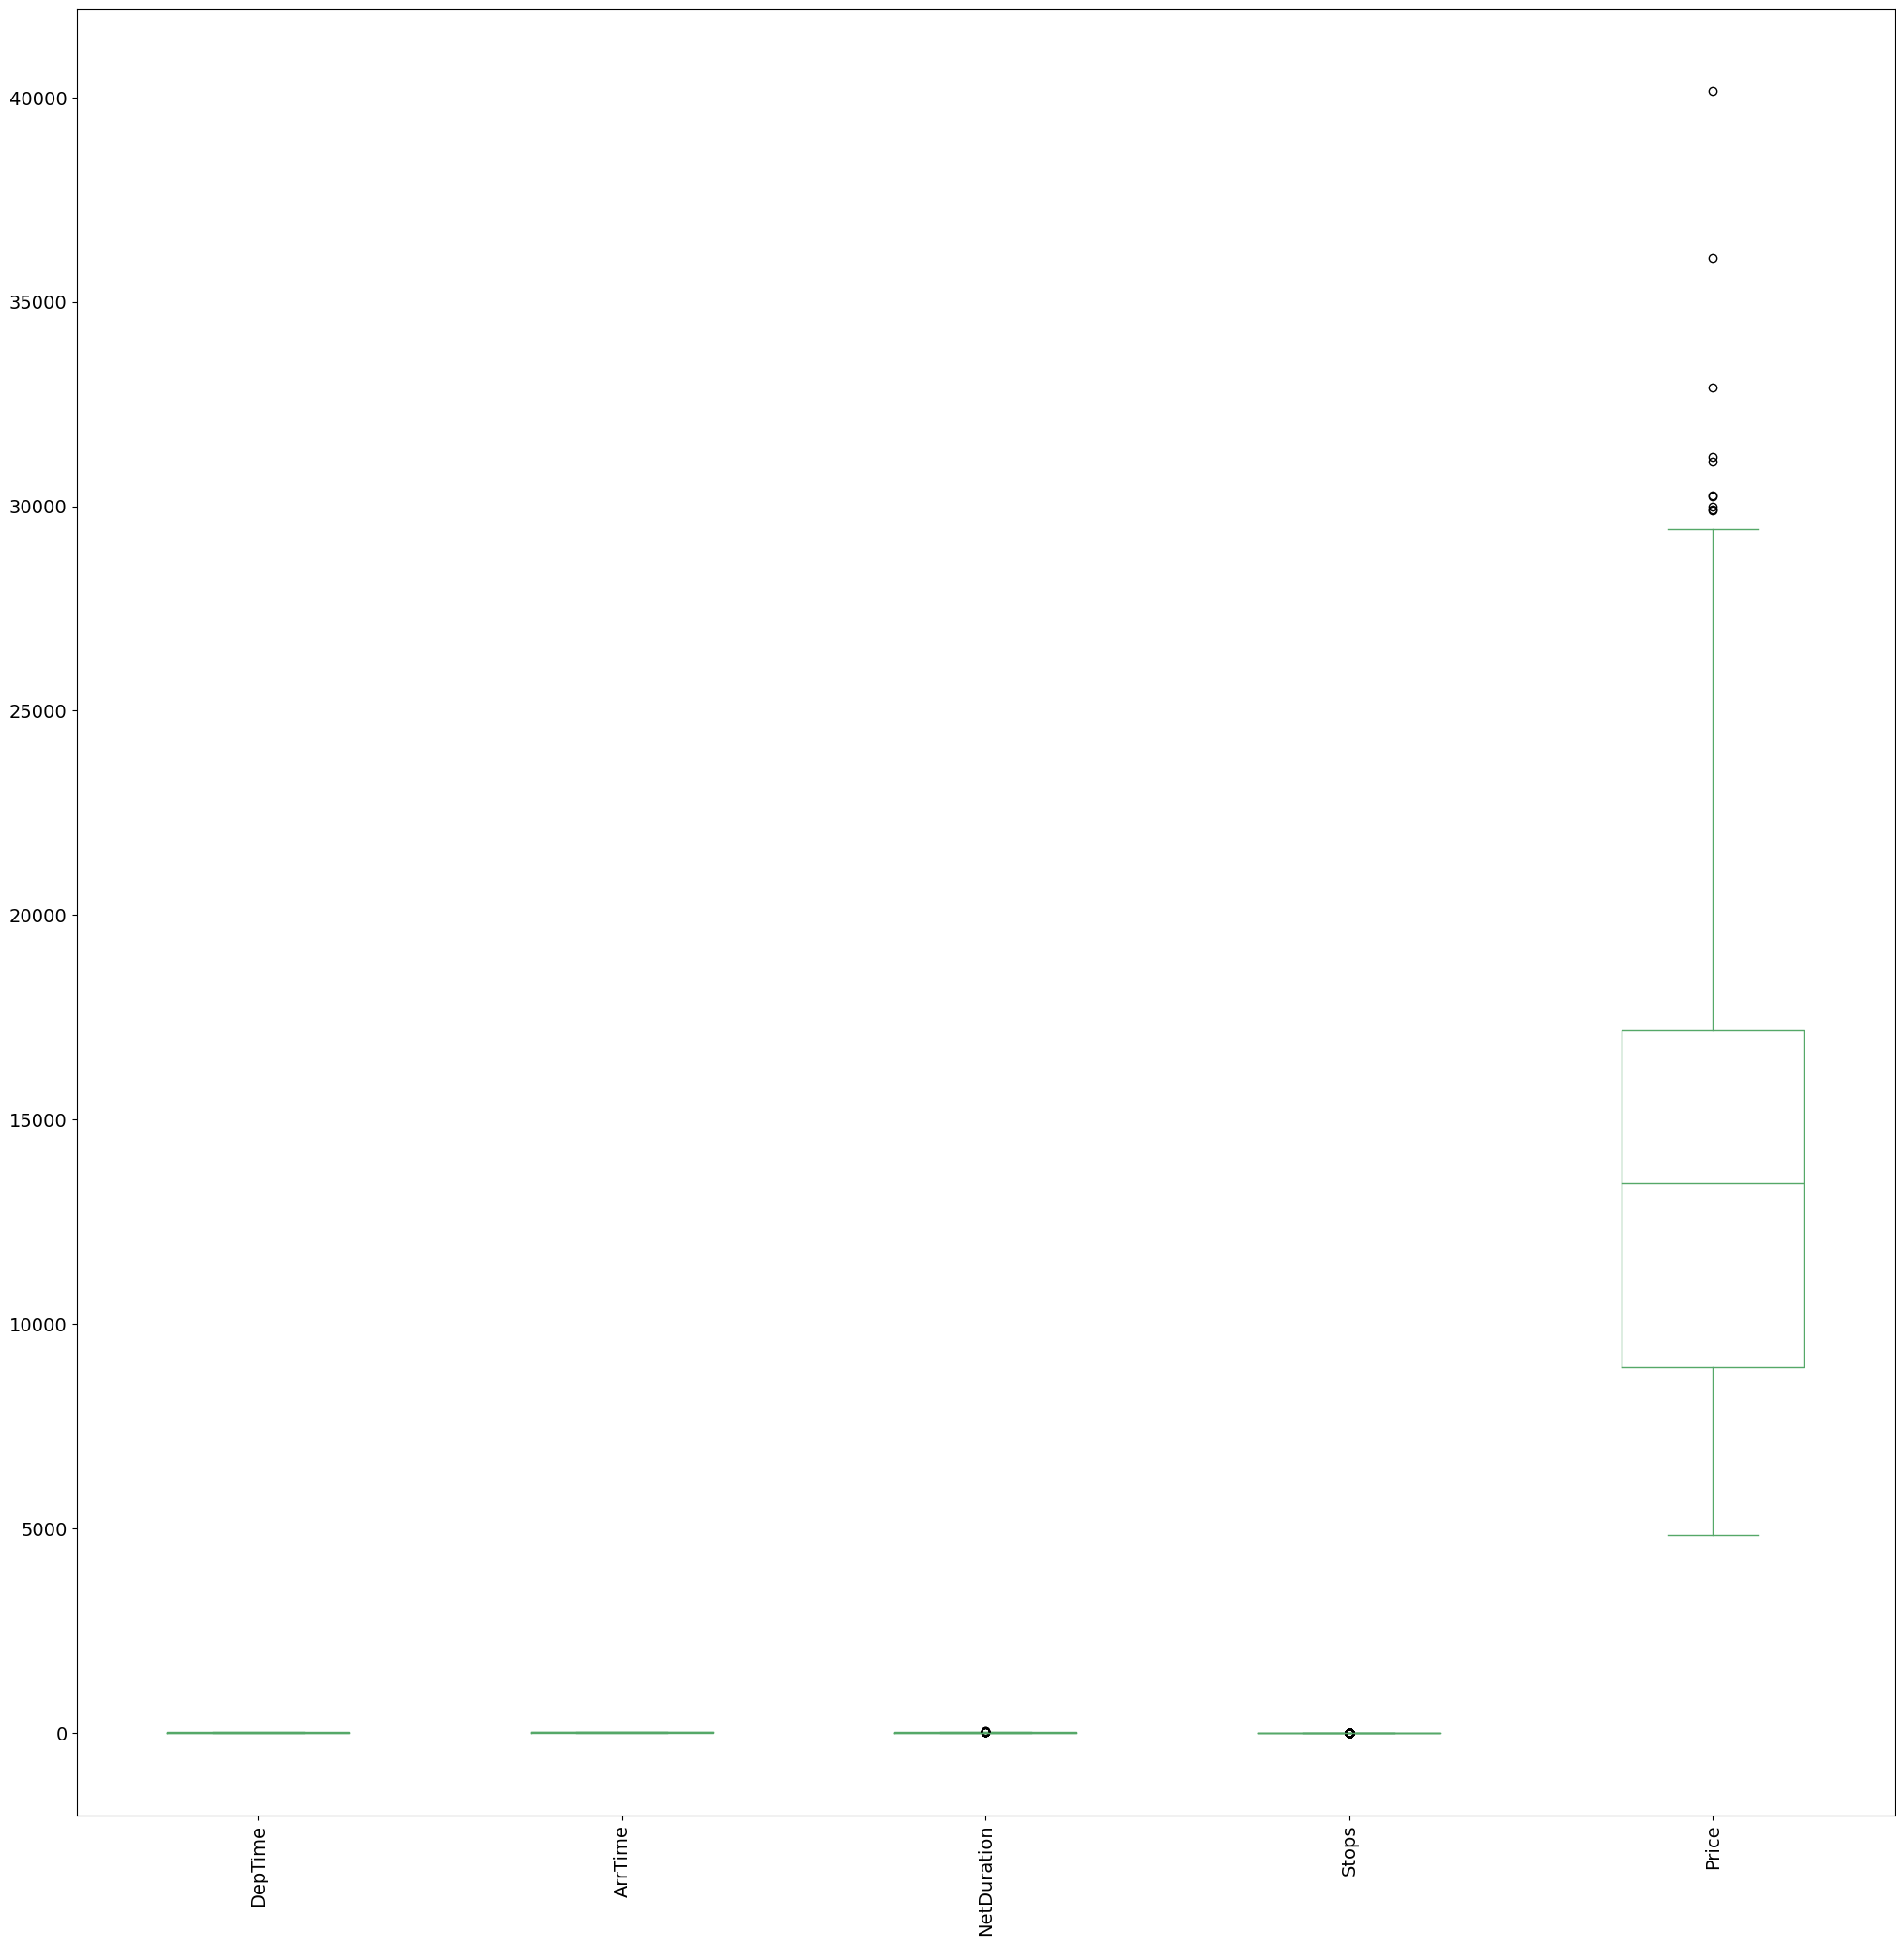

In [133]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='g')

Our data is very less and there are very fiewer no of outlier so we wont be removing it,lets check the skewness.

### Encoding

In [134]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [135]:
df

Name    DepTime    ArrTime  NetDuration  Stops  DepartureLoc  \
0      4.0  13.000000  15.583333     2.583333      0           2.0   
1      4.0   8.333333  11.000000     2.666667      0           2.0   
2      3.0   5.833333   8.583333     2.750000      0           2.0   
3      4.0   5.833333   8.583333     2.750000      0           2.0   
4      4.0   2.416667   5.250000     2.833333      0           2.0   
5      4.0  22.916667   1.750000     2.833333      0           2.0   
6      5.0   6.083333   9.000000     2.916667      0           2.0   
7      4.0   6.916667   9.833333     2.916667      0           2.0   
8      4.0  15.333333  18.250000     2.916667      0           2.0   
9      3.0  16.750000  21.583333     4.833333      1           2.0   
10     3.0  16.000000  20.916667     4.916667      1           2.0   
11     3.0   2.666667   7.750000     5.083333      1           2.0   
12     4.0  12.750000  17.916667     5.166667      1           2.0   
13     3.0  16.750000  22.333333     5.583333      1           2.0   
14     3.0   8.583333  14.333333     5.750000      1           2.0   
15     3.0  18.333333   0.166667     5.833333      1           2.0   
16     3.0  15.750000  21.750000     6.000000      1           2.0   
17     4.0  17.916667  23.916667     6.000000      1           2.0   
18     4.0  12.750000  19.333333     6.583333      1           2.0   
19     4.0  23.333333   6.083333     6.750000      1           2.0   
20     3.0  16.750000   0.166667     7.416667      1           2.0   
21     5.0   9.333333  16.833333     7.500000      1           2.0   
22     4.0   1.833333   9.500000     7.666667      1           2.0   
23     3.0   7.000000  14.750000     7.750000      1           2.0   
24     3.0   9.250000  17.416667     8.166667      1           2.0   
25     4.0  15.000000  23.666667     8.666667      1           2.0   
26     4.0  17.916667   2.583333     8.666667      1           2.0   
27     5.0  15.166667  23.916667     8.750000      1           2.0   
28     5.0  11.916667  21.000000     9.083333      1           2.0   
29     5.0   9.583333  20.666667    11.083333      1           2.0   
30     5.0  11.916667  23.916667    12.000000      1           2.0   
31     5.0  19.500000   8.416667    12.916667      1           2.0   
32     5.0  18.416667   8.416667    14.000000      1           2.0   
33     5.0  18.416667   9.000000    14.583333      1           2.0   
34     5.0   7.083333   8.416667    25.333333      1           2.0   
35     1.0   6.166667   8.916667     2.750000      0           2.0   
36     6.0   6.250000   9.000000     2.750000      0           2.0   
37     0.0  15.500000  20.666667     5.166667      1           2.0   
38     0.0  10.666667  16.416667     5.750000      1           2.0   
39     0.0  16.250000  22.416667     6.166667      2           2.0   
40     0.0   6.083333  13.000000     6.916667      1           2.0   
41     0.0   8.166667  10.666667     2.500000      0           2.0   
42     0.0   9.583333  12.416667     2.833333      0           2.0   
43     0.0  21.666667   0.500000     2.833333      0           2.0   
44     4.0   9.250000  11.916667     2.666667      0           2.0   
45     0.0  21.000000  23.833333     2.833333      0           2.0   
46     4.0   8.500000  15.500000     7.000000      1           2.0   
47     1.0  13.500000  16.250000     2.750000      0           2.0   
48     4.0  21.500000   0.250000     2.750000      0           2.0   
49     4.0  13.166667  18.000000     4.833333      1           2.0   
50     4.0  21.083333   2.583333     5.500000      1           2.0   
51     4.0   6.666667  13.166667     6.500000      1           2.0   
52     4.0  11.250000  18.000000     6.750000      1           2.0   
53     4.0  13.583333  20.666667     7.083333      1           2.0   
54     4.0  11.250000  16.500000     5.250000      1           2.0   
55     4.0  11.500000  14.250000     2.750000      0           2.0   
56     4.0  20.1

In [136]:
df.describe()

Name      DepTime      ArrTime  NetDuration        Stops  \
count  1645.000000  1645.000000  1645.000000  1645.000000  1645.000000   
mean      3.882067    12.806484    14.823404    11.310537     0.976292   
std       1.982147     5.466150     6.194673     7.759098     0.560281   
min       0.000000     0.166667     0.083333     1.000000     0.000000   
25%       3.000000     8.000000     9.833333     5.583333     1.000000   
50%       4.000000    11.916667    16.250000     9.250000     1.000000   
75%       6.000000    17.750000    19.833333    15.916667     1.000000   
max       6.000000    23.500000    23.916667    39.333333     3.000000   

       DepartureLoc   ArrivalLoc         Price  
count   1645.000000  1645.000000   1645.000000  
mean       0.902128     2.728875  13723.021277  
std        0.807975     2.033939   5329.443138  
min        0.000000     0.000000   4849.000000  
25%        0.000000     1.000000   8941.000000  
50%        1.000000     3.000000  13459.000000  
75%        2.000000     5.000000  17178.000000  
max        2.000000     6.000000  40150.000000

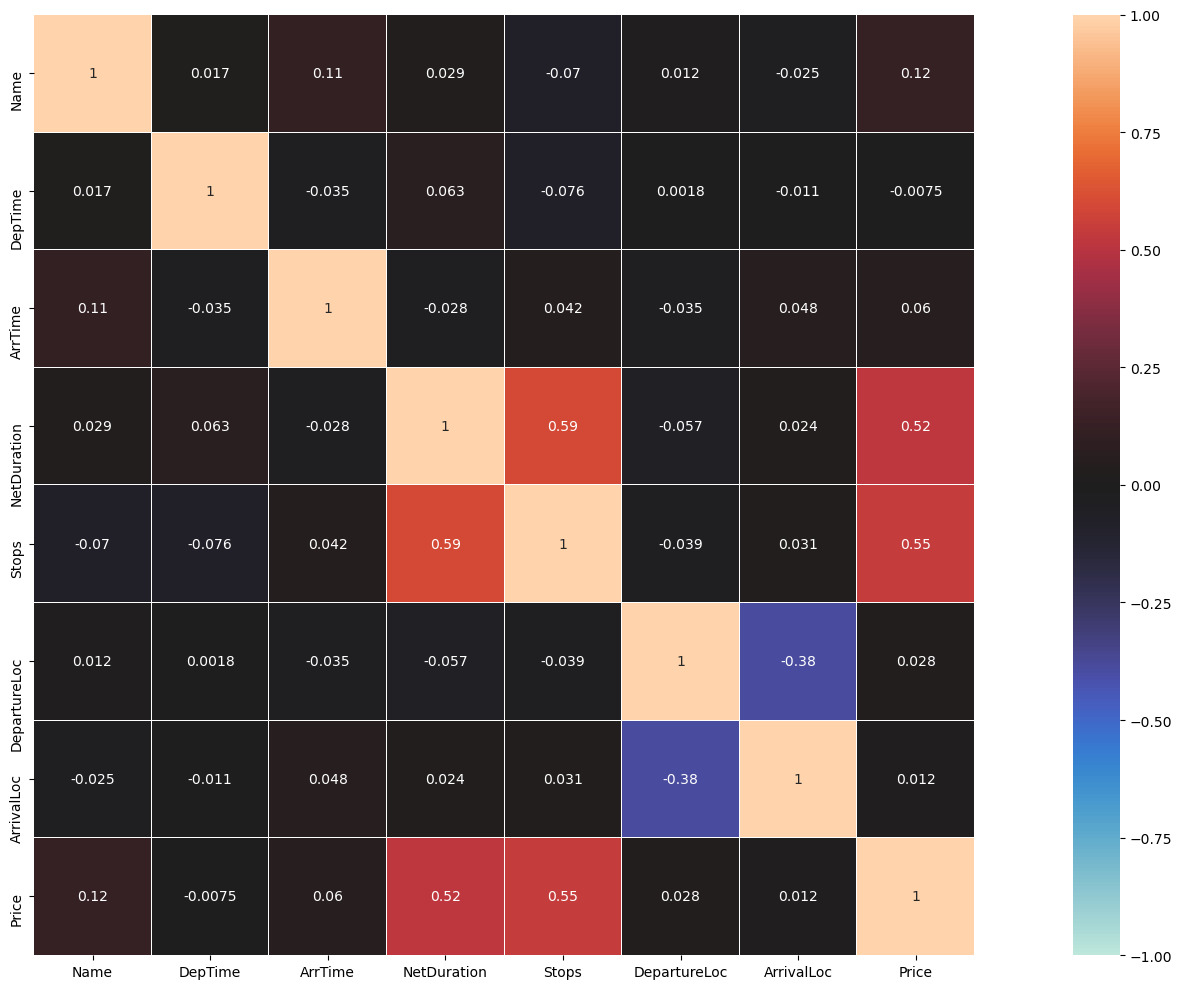

In [139]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

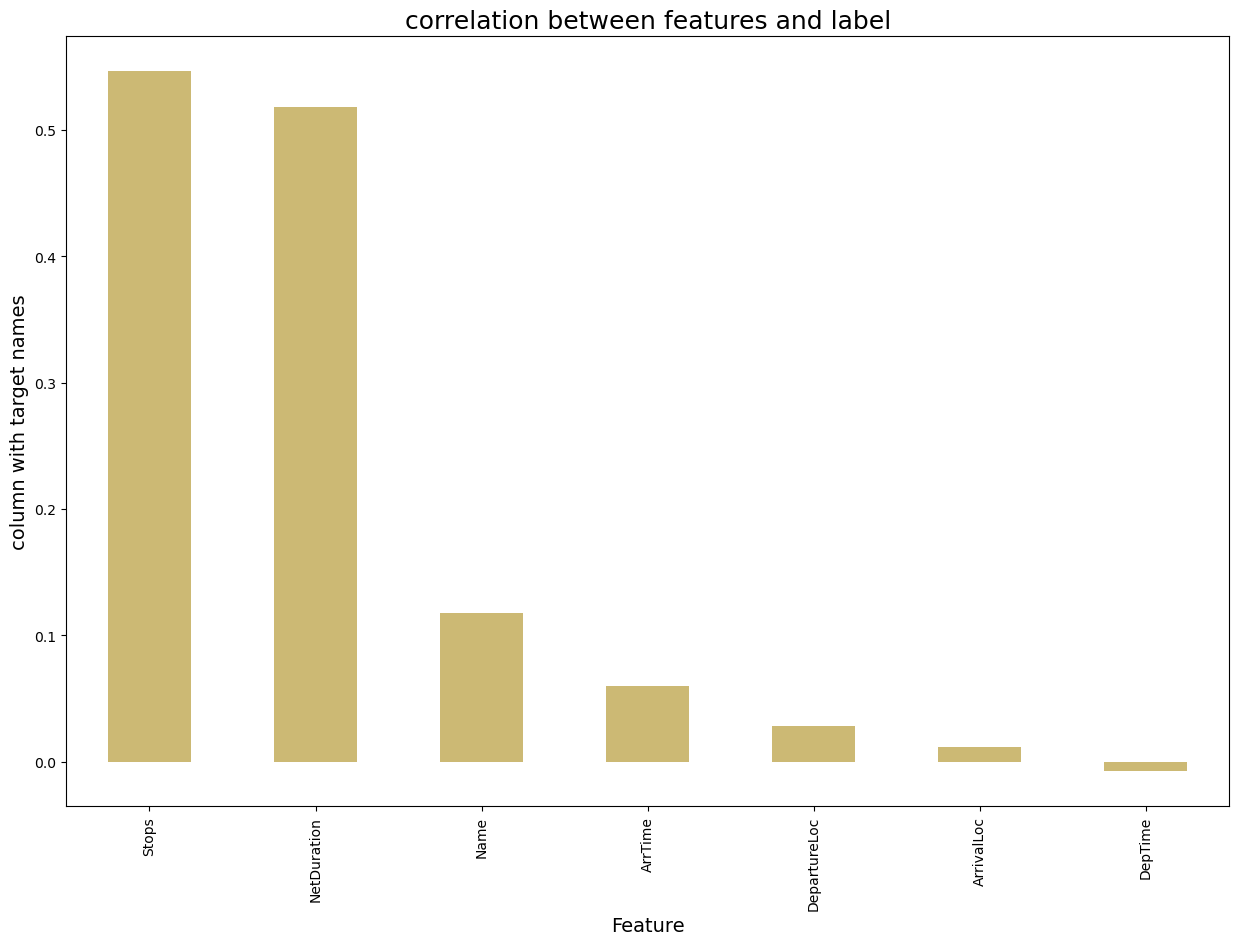

In [140]:
plt.figure(figsize=(15,10))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation between features and label',fontsize=18)
plt.show()

In [141]:
#lets check the skewness
df.skew()

Name           -0.527401
DepTime         0.165813
ArrTime        -0.592504
NetDuration     0.838110
Stops           0.096011
DepartureLoc    0.179731
ArrivalLoc      0.109915
Price           0.700477
dtype: float64

In [142]:
#I will shuffle our data for getting good result while evaluating
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [143]:
df

Name    DepTime    ArrTime  NetDuration  Stops  DepartureLoc  \
0      0.0  17.166667  19.833333     2.666667      0           0.0   
1      4.0  21.083333   2.583333     5.500000      1           2.0   
2      4.0   9.916667  17.583333     7.666667      1           2.0   
3      1.0   6.750000   6.333333    23.583333      1           0.0   
4      1.0  13.500000  16.250000     2.750000      0           2.0   
5      6.0  15.750000  18.083333     2.333333      0           1.0   
6      4.0  17.250000  23.666667     6.416667      1           1.0   
7      6.0  18.833333  21.333333    26.500000      1           0.0   
8      3.0   6.166667   7.750000     1.583333      0           1.0   
9      4.0   8.750000  17.750000     9.000000      1           2.0   
10     4.0  14.833333  19.916667     5.083333      1           0.0   
11     4.0   4.916667   6.250000     1.333333      0           1.0   
12     3.0  19.166667   0.166667     5.000000      1           1.0   
13     1.0   8.000000   8.833333    24.833333      1           2.0   
14     6.0  21.916667   9.666667    11.750000      1           2.0   
15     6.0  10.750000  11.416667    24.666667      2           1.0   
16     0.0  12.250000  19.916667     7.666667      1           0.0   
17     1.0  17.000000  19.666667    26.666667      2           0.0   
18     6.0   6.000000   9.000000    27.000000      1           1.0   
19     4.0  12.666667  14.750000     2.083333      0           1.0   
20     6.0  15.750000  16.333333    24.583333      1           1.0   
21     4.0  16.833333  22.333333     5.500000      1           0.0   
22     1.0   7.000000   0.083333    17.083333      1           1.0   
23     3.0   9.916667  12.166667     2.250000      0           1.0   
24     6.0  17.500000  15.000000    21.500000      2           0.0   
25     6.0  16.750000   9.666667    16.916667      1           2.0   
26     1.0  12.333333   0.333333    12.000000      1           2.0   
27     5.0  11.250000  23.916667    12.666667      1           1.0   
28     4.0  12.583333  22.500000     9.916667      1           0.0   
29     4.0  18.083333  22.083333     4.000000      1           1.0   
30     6.0   7.750000  21.333333    37.583333      2           0.0   
31     3.0   6.000000   7.666667     1.666667      0           0.0   
32     5.0  16.083333  16.333333    24.250000      1           0.0   
33     4.0   8.916667  14.750000     5.833333      1           0.0   
34     6.0   8.750000  11.416667    26.666667      1           1.0   
35     1.0  19.166667   8.833333    13.666667      1           0.0   
36     6.0   8.500000  18.083333     9.583333      2           0.0   
37     6.0  21.666667   9.666667    12.000000      1           0.0   
38     3.0   8.583333  14.333333     5.750000      1           2.0   
39     6.0  14.333333  19.833333     5.500000      1           2.0   
40     4.0   5.583333   9.916667     4.333333      1           1.0   
41     6.0   6.250000  19.833333    13.583333      2           2.0   
42     3.0  15.750000   1.333333     9.583333      1           0.0   
43     4.0   9.916667  17.250000     7.333333      1           1.0   
44     5.0   9.500000  18.916667     9.416667      1           0.0   
45     6.0  10.750000  20.250000     9.500000      2           1.0   
46     4.0  10.166667  17.333333     7.166667      1           2.0   
47     5.0  18.416667  21.166667     2.750000      0           2.0   
48     3.0  10.750000  18.166667     7.416667      1           1.0   
49     0.0  12.833333  21.666667     8.833333      2           2.0   
50     1.0  16.000000   0.666667     8.666667      1           1.0   
51     6.0  11.916667  11.416667    23.500000      1           1.0   
52     4.0   2.500000   9.750000     7.250000      1           0.0   
53     5.0  14.333333  15.416667    25.083333      1           2.0   
54     1.0  20.000000   7.416667    11.416667      1           2.0   
55     4.0  11.250000  18.000000     6.750000      1           2.0   
56     5.0  14.7

## Model Building 

In [144]:
#Seperrating Features and Labels
x = df.drop(columns = 'Price')
y = df['Price']

In [145]:
#lets check skewness
x.skew()

Name           -0.527401
DepTime         0.165813
ArrTime        -0.592504
NetDuration     0.838110
Stops           0.096011
DepartureLoc    0.179731
ArrivalLoc      0.109915
dtype: float64

In [146]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [147]:
#lets check skewness
x.skew()

Name           -0.527401
DepTime         0.165813
ArrTime        -0.592504
NetDuration    -0.333333
Stops           0.096011
DepartureLoc    0.179731
ArrivalLoc      0.109915
dtype: float64

In [150]:
# Applying standard scaler to numeric column

#lets apply standard scaler to numerical features to bring them to common scale
numeric = ['DepTime','ArrTime','NetDuration']
categorical = ['Name','DepartureLoc','ArrivalLoc','Stops']
scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(x[numeric]), columns=numeric)
X_std = pd.merge(X_numeric_std, x[categorical], left_index=True, right_index=True)

In [151]:
X_std

DepTime   ArrTime  NetDuration  Name  DepartureLoc  ArrivalLoc  Stops
0     0.797912  0.808994    -1.434097   0.0           0.0         3.0      0
1     1.514661 -1.976504    -0.607957   4.0           2.0         0.0      1
2    -0.528836  0.445668    -0.192834   4.0           2.0         1.0      1
3    -1.108335 -1.370961     1.311606   1.0           0.0         2.0      1
4     0.126913  0.230364    -1.401669   1.0           2.0         0.0      0
5     0.538663  0.526407    -1.571629   6.0           1.0         5.0      0
6     0.813162  1.427993    -0.417587   4.0           1.0         0.0      1
7     1.102912  1.051211     1.473390   6.0           0.0         2.0      1
8    -1.215085 -1.142200    -1.939436   3.0           1.0         0.0      0
9    -0.742336  0.472581     0.013659   4.0           2.0         6.0      1
10    0.370913  0.822450    -0.703554   4.0           0.0         4.0      1
11   -1.443835 -1.384417    -2.086308   4.0           1.0         2.0      0
12    1.163912 -2.366742    -0.723458   3.0           1.0         5.0      1
13   -0.879585 -0.967265     1.383174   1.0           2.0         3.0      1
14    1.667161 -0.832700     0.364228   6.0           2.0         3.0      1
15   -0.376336 -0.550114     1.373834   6.0           1.0         6.0      2
16   -0.101836  0.822450    -0.192834   0.0           0.0         5.0      1
17    0.767412  0.782081     1.482109   1.0           0.0         6.0      2
18   -1.245585 -0.940352     1.499391   6.0           1.0         0.0      1
19   -0.025587 -0.011853    -1.684127   4.0           1.0         5.0      0
20    0.538663  0.243820     1.369142   6.0           1.0         1.0      1
21    0.736912  1.212689    -0.607957   4.0           0.0         3.0      1
22   -1.062585 -2.380199     0.868495   1.0           1.0         0.0      1
23   -0.528836 -0.429005    -1.608162   3.0           1.0         5.0      0
24    0.858912  0.028516     1.183824   6.0           0.0         4.0      2
25    0.721662 -0.832700     0.855134   6.0           2.0         3.0      1
26   -0.086587 -2.339829     0.392248   1.0           2.0         0.0      1
27   -0.284836  1.468363     0.464413   5.0           1.0         0.0      1
28   -0.040837  1.239602     0.140217   4.0           0.0         3.0      1
29    0.965662  1.172320    -0.986546   4.0           1.0         1.0      1
30   -0.925335  1.051211     1.962037   6.0           0.0         2.0      2
31   -1.245585 -1.155656    -1.893623   3.0           0.0         4.0      0
32    0.599663  0.243820     1.350217   5.0           0.0         5.0      1
33   -0.711836 -0.011853    -0.535792   4.0           0.0         4.0      1
34   -0.742336 -0.550114     1.482109   6.0           1.0         6.0      1
35    1.163912 -0.967265     0.566314   1.0           0.0         3.0      1
36   -0.788086  0.526407     0.095470   6.0           0.0         3.0      2
37    1.621411 -0.832700     0.392248   6.0           0.0         3.0      1
38   -0.772836 -0.079136    -0.553498   3.0           2.0         0.0      1
39    0.279413  0.808994    -0.607957   6.0           2.0         1.0      1
40   -1.321835 -0.792331    -0.893418   4.0           1.0         0.0      1
41   -1.199835  0.808994     0.558091   6.0           2.0         1.0      2
42    0.538663 -2.178351     0.095470   3.0           0.0         4.0      1
43   -0.528836  0.391842    -0.249429   4.0           1.0         6.0      1
44   -0.605086  0.660972     0.072565   5.0           0.0         4.0      1
45   -0.376336  0.876276     0.084063   6.0           1.0         1.0      2
46   -0.483086  0.405299    -0.278582   4.0           2.0         0.0      1
47    1.026662  1.024298    -1.401669   5.0           2.0         1.0      0
48   -0.376336  0.539864    -0.235071   3.0           1.0         5.0      1
49    0.004913  1.105037    -0.010593   0.0           2.0         0.0      2
50    0.584413 -2.286003    -0.035261   1.0           1.0         2.0      1
51 

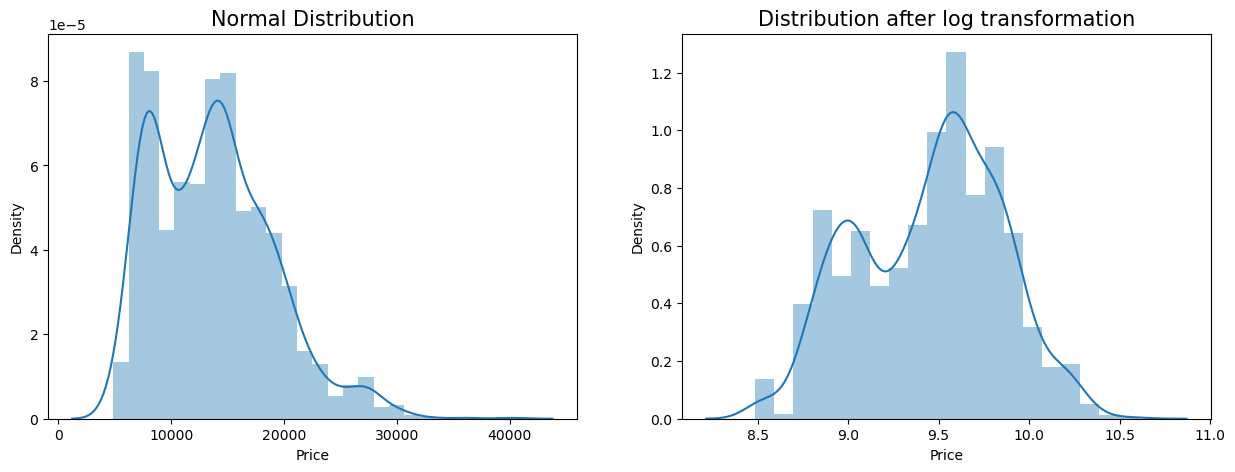

In [152]:
# applying log transformation to our target
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Distribution after log transformation",fontsize=15)
sns.distplot(np.log(y))
plt.show()

In [153]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(X_std, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.5330842991113092 on Random State 2


## Model building With Evaluation

In [154]:
#Model Building With Evaluation
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y),test_size = 0.25, random_state =2)
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
ext = ExtraTreesRegressor()
lgb = LGBMRegressor()
lasso = LassoCV(max_iter=1000, normalize = True)
ridge = RidgeCV(cv=10,alphas=[0.1,1], normalize=True)
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print(f"Training r2 score:", r2_score(y_train,y_pred)*100,"%")
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X_std, np.log(y), cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()

******************************LinearRegression******************************
MAE : 0.2280748882922861
RMSE : 0.3029534417784993
------------------------------
Training r2 score: 45.29271739730887 %
Testing r2 Score: 44.3490819148992 %
------------------------------

Cross validation score : 44.072656994699166

Accuracy Score - Cross Validation Score : 0.27642492020003573


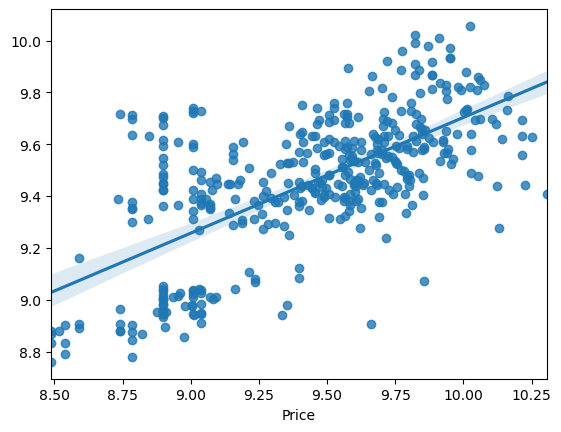

******************************LassoCV******************************
MAE : 0.22894243922863686
RMSE : 0.30340553329813097
------------------------------
Training r2 score: 45.24947553095843 %
Testing r2 Score: 44.182864423849175 %
------------------------------

Cross validation score : 44.1824671568919

Accuracy Score - Cross Validation Score : 0.0003972669572718246


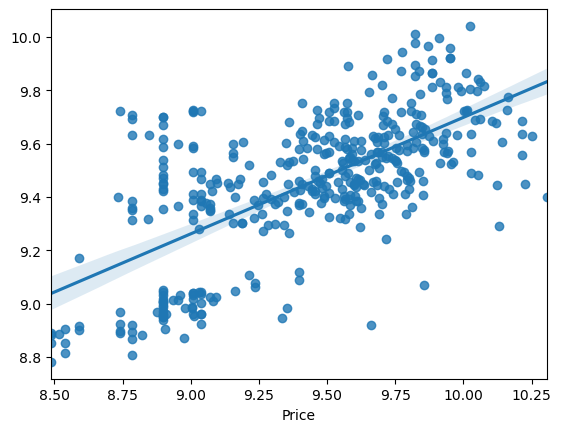

******************************RidgeCV******************************
MAE : 0.23017280535163834
RMSE : 0.30316773051642
------------------------------
Training r2 score: 45.1165503795316 %
Testing r2 Score: 44.270326694109215 %
------------------------------

Cross validation score : 44.00933100486358

Accuracy Score - Cross Validation Score : 0.26099568924563243


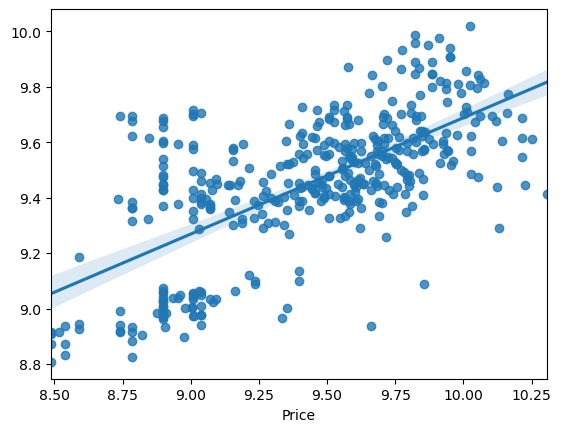

******************************DecisionTreeRegressor******************************
MAE : 0.1881933834325909
RMSE : 0.30054435812114627
------------------------------
Training r2 score: 99.81196930513636 %
Testing r2 Score: 45.23063429941708 %
------------------------------

Cross validation score : 39.78902436825489

Accuracy Score - Cross Validation Score : 5.441609931162191


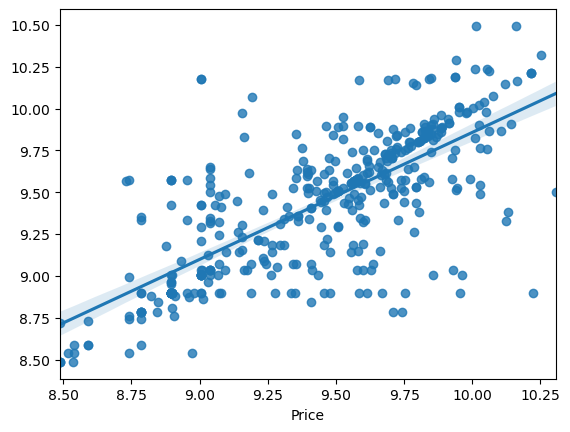

******************************RandomForestRegressor******************************
MAE : 0.1617131807399298
RMSE : 0.23072260797489347
------------------------------
Training r2 score: 94.6260850192603 %
Testing r2 Score: 67.7224281847455 %
------------------------------

Cross validation score : 67.35395595769629

Accuracy Score - Cross Validation Score : 0.36847222704921023


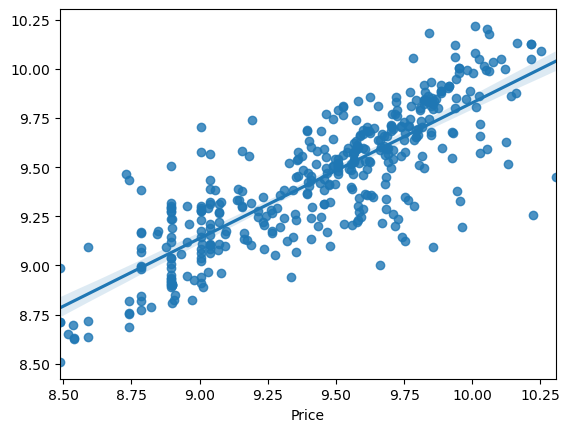

******************************XGBRegressor******************************
MAE : 0.16898376396418707
RMSE : 0.2322920073254295
------------------------------
Training r2 score: 98.56228284085653 %
Testing r2 Score: 67.28182389580691 %
------------------------------

Cross validation score : 67.51363993218904

Accuracy Score - Cross Validation Score : -0.23181603638212778


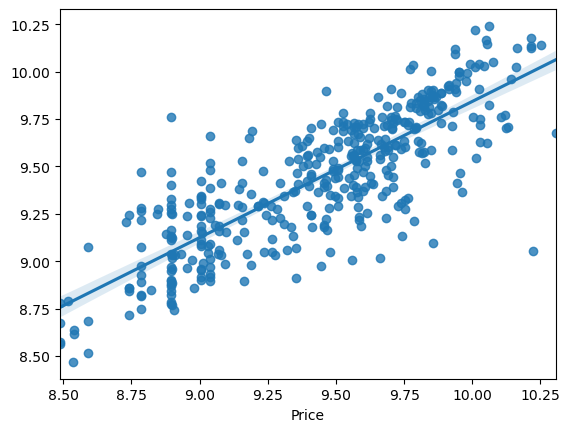

******************************ExtraTreesRegressor******************************
MAE : 0.15403057606441417
RMSE : 0.2293535402937536
------------------------------
Training r2 score: 99.81196930513636 %
Testing r2 Score: 68.10435063592007 %
------------------------------

Cross validation score : 66.05004339705857

Accuracy Score - Cross Validation Score : 2.0543072388614974


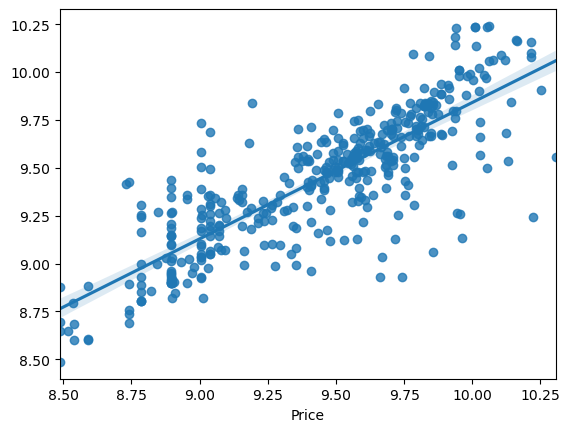

******************************LGBMRegressor******************************
MAE : 0.16523450089908823
RMSE : 0.22355228290091994
------------------------------
Training r2 score: 89.15061906362726 %
Testing r2 Score: 69.69747834501155 %
------------------------------

Cross validation score : 67.73185051906434

Accuracy Score - Cross Validation Score : 1.9656278259472089


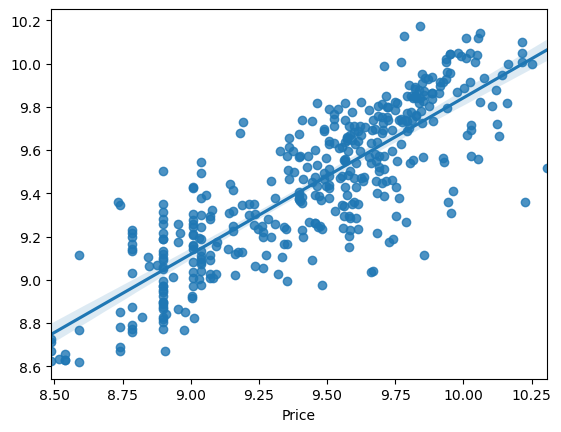

In [155]:
for model in [lr,lasso,ridge,dt,rf,xgb,ext,lgb]:
    BuiltModel(model)

In [168]:
# Hyperparameter Tuning
#lets selects different parameters for tuning
grid_params = {
                'boosting_type': ['str','gbdt'],
                'max_depth ':[-1,-0.5],
                'learning_rate': [0.1,0.2,0.3],
                'n_estimators':[800,900,1000]
                }
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(LGBMRegressor(), grid_params,verbose=1,refit=True,n_jobs=-1, cv = 5)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['str', 'gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth ': [-1, -0.5],
                         'n_estimators': [800, 900, 1000]},
             verbose=1)

In [169]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth ': -1,
 'n_estimators': 800}

### Final model

In [170]:
#lets train and test our final model with best parameters
model = LGBMRegressor(boosting_type = 'gbdt', learning_rate = 0.1, n_estimators = 800, max_depth=-1)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.16477949722748855
RMSE : 0.22862356424245794
------------------------------
 
r2 Score: 68.30705958920052 %


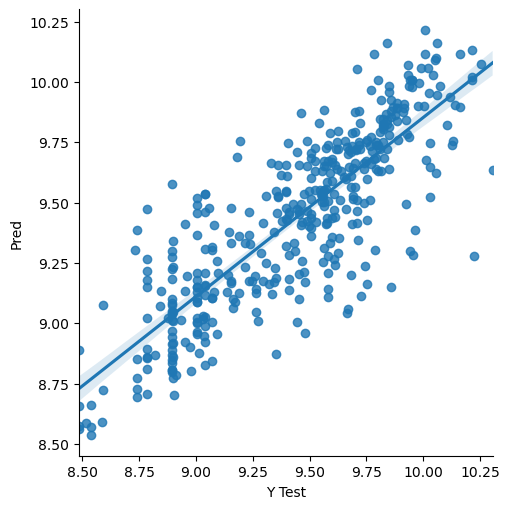

In [172]:
#Lets see the graph for actual vs predicted values
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

In [174]:
predicted_prices = np.exp(pred)

In [175]:
predicted_prices

array([19448.11743047, 21933.26709079, 13751.80225525, 14029.88314388,
       15316.1762125 , 16148.56679431,  6802.2393658 ,  9913.98333871,
       19931.75449665, 10066.58710546, 16963.05159883, 20463.2430676 ,
       15638.0056915 ,  7670.06114182,  6970.92413411, 10230.10634788,
        7777.76944179, 15343.90583857, 13848.14490954, 10934.55645338,
        8120.63706962, 14080.36539058,  5757.96106473, 12878.89207732,
        7106.04927932, 16021.17871859, 10689.20035164, 13565.3083295 ,
       14217.98592545,  6700.77746901, 18793.82560683, 12878.80842849,
        9258.07161932,  9394.99936676, 14040.28538811, 18544.27613353,
       13337.6261593 , 16744.49276576,  6467.55960977, 17170.61890407,
       10978.15650051,  9029.21920611, 15760.21461469, 18591.40563818,
        9415.31699906, 15900.1100046 , 12587.46969156, 13970.95956523,
       11234.61694243, 17722.29765794, 14039.37680834, 13360.89698508,
        8851.36367296,  7654.07744889, 13218.08336658, 24279.23423384,
      

## Model Saving

In [176]:
import joblib
joblib.dump(model,"FlightPrice_prediction.pkl")

['FlightPrice_prediction.pkl']

## Conclusion:
In this project we have scraped the flight data from yatra.com. Then the csv file is loaded into a dataframe.

Luckily we don't have any missing values in our data set.

Looking at the data set we understand that there are some features needs to be processed like converting the data types, and get the actual value from the string entries from the time related columns.

After the data is been processed I have done some EDA to understand the relation among features and the target variable.

Features like flight duration, number of stops during the journey are playing major role in predicting the prices of the flights

As looking at the features we came to know that the number of features are very less, due to which we are getting somewhat lower r2-scores.

some algorithms are facing over-fitting problem which may be because of less number of features in our dataset.

We can get a better r2 score than now by fetching some more features from the web scraping by that we may also reduce the over fitting problem in our models.